# Reverse Engineering. Freakonomics Testing, ITBS, CPS Classroom Data.

In [59]:
import numpy as np
import pandas as pd
import Levenshtein as lev

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import fcluster

import matplotlib.pyplot as plt

In [64]:
f = open("Testing_Data_A.txt", "r")
str_A = f.read()
arr_A = np.array(str_A.split(" "))

fb = open("Testing_Data_B.txt", "r")
str_B = fb.read()
arr_B = np.array(str_B.split("\n"))


print(arr_B)

['112a4a342cb214d0001acd24a3a12dadbcb4a0000000'
 'd4a2341cacbddad3142a2344a2ac23421c00adb4b3cb'
 '1b2a34d4ac42d23b141acd24a3a12dadbcb4a2134141'
 'dbaab3dcacb1dadbc42ac2cc31012dadbcb4adb40000'
 'd12443d43232d32323c213c22d2c23234c332db4b300'
 'db2abad1acbdda212b1acd24a3a12dadbcb400000000'
 'd4aab2124cbddadbcb1a42cca3412dadbcb423134bc1'
 '1b33b4d4a2b1dadbc3ca22c000000000000000000000'
 'd43a3a24acb1d32b412acd24a3a12dadbcb422143bco'
 '313a3ad1ac3d2a23431223c000012dadbcb400000000'
 'db2a33dcacbd32d313c21142323cc300000000000000'
 'd43ab4d1ac3dd43421240d24a3a12dadbcb400000000'
 'db223a24acb11a3b24cacd12a241cdadbcb4adb4b300'
 'db4abadcacb1dad3141ac212a3a1c3a144ba2db41b43'
 '1142340c2cbddadb4b1acd24a3a12dadbcb43d133bc4'
 '214ab4dc4cbdd31b1b2213c4ad412dadbcb4adb00000'
 '1423b4d4a23d24131413234123a243a2413a21441343'
 '3b3ab4d14c3d2ad4cbcac1c003a12dadbcb4adb40000'
 'dba2ba21ac3d2ad3c4c4cd40a3a12dadbcb400000000'
 'd122ba2cacbd1a13211a2d02a2412dOdbcb4adb4b3c0'
 '144a3adc4cbddadbcbc2c2cc43a12dadbcb421

In [61]:
def lev_distances(arr):
    distances = np.zeros((len(arr), len(arr)))

    for i, str1 in enumerate(arr):
        for j, str2 in enumerate(arr):
            if (i != j):
                distances[i, j] = lev.distance(str1, str2)
            else:
                distances[i,j] = 0

    condensed_dist = squareform(distances)

    Z = linkage(condensed_dist, 'single')
    dendrogram(Z, labels=arr)
    plt.show()

    return Z

In [62]:

def cluster_keys(Z, title, threshold=20):

    cutoff_threshold = threshold  # Example threshold

    # Form flat clusters from the hierarchical clustering
    clusters = fcluster(Z, cutoff_threshold, criterion='distance')

    # `clusters` is an array of cluster labels assigned to each string

    cluster_dict = {}

    for string, cluster_id in zip(arr_A, clusters):
        if cluster_id not in cluster_dict:
            cluster_dict[cluster_id] = [string]
        else:
            cluster_dict[cluster_id].append(string)
    
    print(title)
    
    for c_id, c_strings in cluster_dict.items():
        print(f"Cluster {c_id}:")
        for string in c_strings:
            print(f" - {string}")


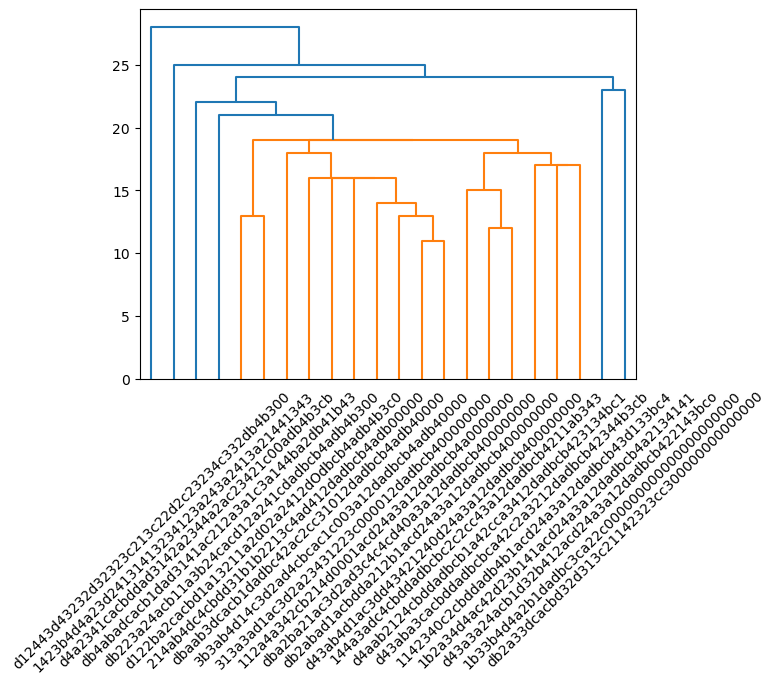

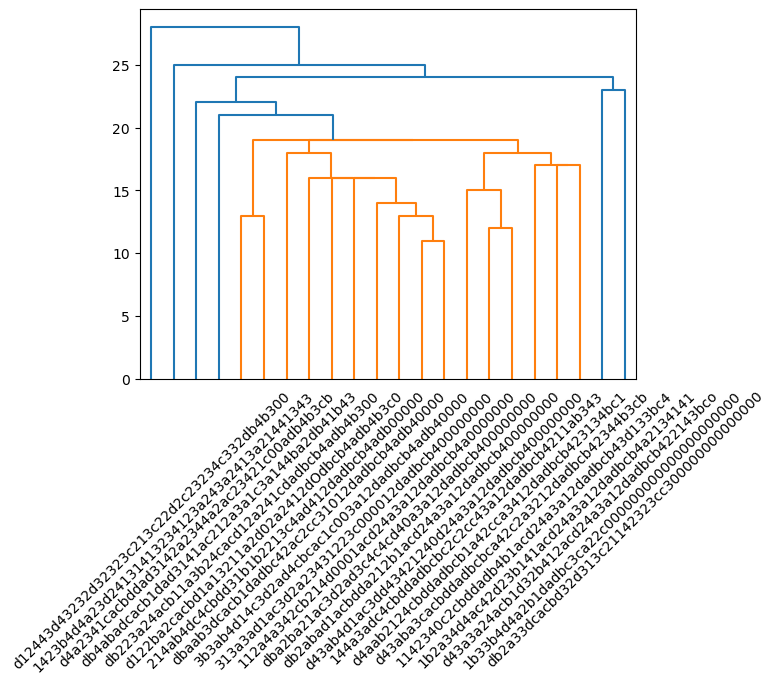

Class A
Cluster 1:
 - 112a4a342cb214d0001acd24a3a12dadbcb4a0000000
 - 1b2a34d4ac42d23b141acd24a3a12dadbcb4a2134141
 - dbaab3dcacb1dadbc42ac2cc31012dadbcb4adb40000
 - db2abad1acbdda212b1acd24a3a12dadbcb400000000
 - d4aab2124cbddadbcb1a42cca3412dadbcb423134bc1
 - d43a3a24acb1d32b412acd24a3a12dadbcb422143bco
 - 313a3ad1ac3d2a23431223c000012dadbcb400000000
 - d43ab4d1ac3dd43421240d24a3a12dadbcb400000000
 - db223a24acb11a3b24cacd12a241cdadbcb4adb4b300
 - 1142340c2cbddadb4b1acd24a3a12dadbcb43d133bc4
 - 214ab4dc4cbdd31b1b2213c4ad412dadbcb4adb00000
 - 3b3ab4d14c3d2ad4cbcac1c003a12dadbcb4adb40000
 - dba2ba21ac3d2ad3c4c4cd40a3a12dadbcb400000000
 - d122ba2cacbd1a13211a2d02a2412dOdbcb4adb4b3c0
 - 144a3adc4cbddadbcbc2c2cc43a12dadbcb4211ab343
 - d43aba3cacbddadbcbca42c2a3212dadbcb42344b3cb
Cluster 3:
 - d4a2341cacbddad3142a2344a2ac23421c00adb4b3cb
Cluster 7:
 - d12443d43232d32323c213c22d2c23234c332db4b300
Cluster 4:
 - 1b33b4d4a2b1dadbc3ca22c000000000000000000000
Cluster 5:
 - db2a33dcacbd32d313c211

In [63]:
Z_A = lev_distances(arr_A)
Z_B = lev_distances(arr_B)

cluster_keys(Z_A, "Class A")
cluster_keys(Z_B, "Class_B")